<a href="https://www.kaggle.com/code/samithsachidanandan/fruit-and-vegetable-classification-nn?scriptVersionId=273964457" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout

train_dir = Path('../input/fruit-and-vegetable-image-recognition/train')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

test_dir = Path('../input/fruit-and-vegetable-image-recognition/test')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

val_dir = Path('../input/fruit-and-vegetable-image-recognition/validation')
val_filepaths = list(val_dir.glob(r'**/*.jpg'))

def proc_img(filepath):
  

    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

   
    df = pd.concat([filepath, labels], axis=1)

 
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

train_df = proc_img(train_filepaths)
test_df = proc_img(test_filepaths)
val_df = proc_img(val_filepaths)

2025-11-06 11:51:38.728168: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762429899.004238      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762429899.078380      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 2780

Number of different labels: 36

Labels: ['raddish' 'soy beans' 'pomegranate' 'lettuce' 'beetroot' 'cucumber'
 'jalepeno' 'tomato' 'eggplant' 'peas' 'garlic' 'apple' 'watermelon'
 'grapes' 'spinach' 'orange' 'carrot' 'mango' 'kiwi' 'sweetpotato'
 'capsicum' 'banana' 'onion' 'cabbage' 'ginger' 'pineapple'
 'chilli pepper' 'turnip' 'corn' 'paprika' 'potato' 'bell pepper'
 'cauliflower' 'pear' 'lemon' 'sweetcorn']


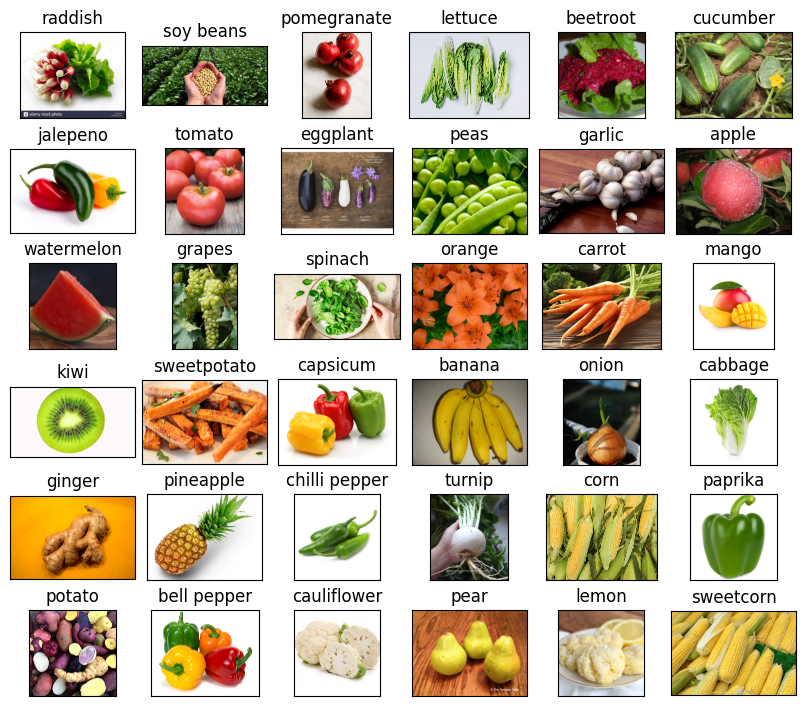

In [3]:
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()


fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [4]:
train_ds_raw = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    label_mode='int',
    image_size=(224, 224),
    shuffle=True
)

val_ds_raw = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    label_mode='int',
    image_size=(224, 224),
    shuffle=False
)

test_ds_raw = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    label_mode='int',
    image_size=(224, 224),
    shuffle=False
)

Found 3115 files belonging to 36 classes.


I0000 00:00:1762429936.838324      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1762429936.839004      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Found 351 files belonging to 36 classes.
Found 359 files belonging to 36 classes.


In [5]:
class_names = train_ds_raw.class_names
num_classes = len(class_names)

In [6]:
batch = next(train_ds_raw.as_numpy_iterator())

In [7]:
batch[0].shape

(32, 224, 224, 3)

In [8]:
class_names = train_ds_raw.class_names
print(class_names)

['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


In [9]:
idx_to_class = {i: name for i, name in enumerate(class_names)}
print("Index → Class:", idx_to_class)


Index → Class: {0: 'apple', 1: 'banana', 2: 'beetroot', 3: 'bell pepper', 4: 'cabbage', 5: 'capsicum', 6: 'carrot', 7: 'cauliflower', 8: 'chilli pepper', 9: 'corn', 10: 'cucumber', 11: 'eggplant', 12: 'garlic', 13: 'ginger', 14: 'grapes', 15: 'jalepeno', 16: 'kiwi', 17: 'lemon', 18: 'lettuce', 19: 'mango', 20: 'onion', 21: 'orange', 22: 'paprika', 23: 'pear', 24: 'peas', 25: 'pineapple', 26: 'pomegranate', 27: 'potato', 28: 'raddish', 29: 'soy beans', 30: 'spinach', 31: 'sweetcorn', 32: 'sweetpotato', 33: 'tomato', 34: 'turnip', 35: 'watermelon'}


In [10]:
class_to_idx = {name: i for i, name in enumerate(class_names)}
print("Class → Index:", class_to_idx)

Class → Index: {'apple': 0, 'banana': 1, 'beetroot': 2, 'bell pepper': 3, 'cabbage': 4, 'capsicum': 5, 'carrot': 6, 'cauliflower': 7, 'chilli pepper': 8, 'corn': 9, 'cucumber': 10, 'eggplant': 11, 'garlic': 12, 'ginger': 13, 'grapes': 14, 'jalepeno': 15, 'kiwi': 16, 'lemon': 17, 'lettuce': 18, 'mango': 19, 'onion': 20, 'orange': 21, 'paprika': 22, 'pear': 23, 'peas': 24, 'pineapple': 25, 'pomegranate': 26, 'potato': 27, 'raddish': 28, 'soy beans': 29, 'spinach': 30, 'sweetcorn': 31, 'sweetpotato': 32, 'tomato': 33, 'turnip': 34, 'watermelon': 35}


In [11]:
train_ds = train_ds_raw.map(lambda x, y: (x/255,y))
test_ds = test_ds_raw.map(lambda x, y: (x/255,y))
val_ds = val_ds_raw.map(lambda x, y: (x/255,y))

In [12]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(AUTOTUNE)
val_ds = test_ds.cache().prefetch(AUTOTUNE)
test_ds = val_ds.cache().prefetch(AUTOTUNE)


In [13]:
train_ds.as_numpy_iterator().next()[0].min()

0.0

In [14]:
model = Sequential([
    
    Input(shape=(224,224,3)),

    Conv2D(16, (3,3), activation='relu'),
    MaxPooling2D(),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),

    Conv2D(16, (3,3), activation='relu'),
    MaxPooling2D(),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')   
])

In [15]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',   
    metrics=['accuracy']
)

In [16]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,769,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 36)             │         9,252 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,788,116 (10.64 MB)

 Trainable params: 2,788,116 (10.64 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")

In [19]:
hist = model.fit(
    train_ds,
    epochs=20,
    validation_data=val_ds,
    callbacks=[tensorboard_callback]
)

Epoch 1/20


I0000 00:00:1762429943.795378      69 service.cc:148] XLA service 0x7a3ce00065d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1762429943.797460      69 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1762429943.797482      69 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1762429944.411989      69 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1762429948.211309      69 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


98/98 ━━━━━━━━━━━━━━━━━━━━ 51s 449ms/step - accuracy: 0.0601 - loss: 3.4592 - val_accuracy: 0.1811 - val_loss: 2.8810
Epoch 2/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.1708 - loss: 2.9286 - val_accuracy: 0.4513 - val_loss: 2.1012
Epoch 3/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.3314 - loss: 2.3455 - val_accuracy: 0.6741 - val_loss: 1.2966
Epoch 4/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5172 - loss: 1.6814 - val_accuracy: 0.7716 - val_loss: 0.9114
Epoch 5/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7027 - loss: 1.0488 - val_accuracy: 0.8022 - val_loss: 0.8084
Epoch 6/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8017 - loss: 0.7106 - val_accuracy: 0.9248 - val_loss: 0.5417
Epoch 7/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8738 - loss: 0.4707 - val_accuracy: 0.9248 - val_loss: 0.4286
Epoch 8/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9313 - loss: 0.2670 - val_accuracy: 0.9387 - val_loss: 

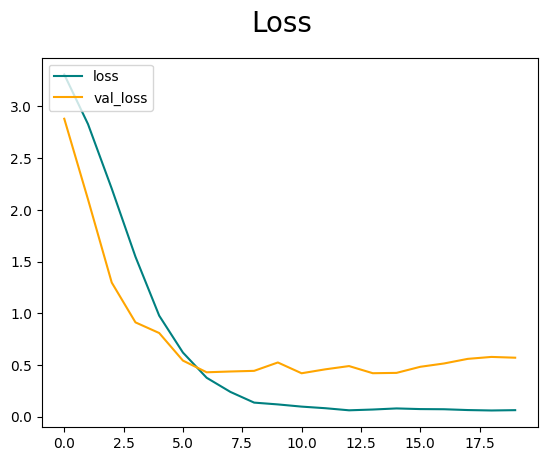

In [20]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()


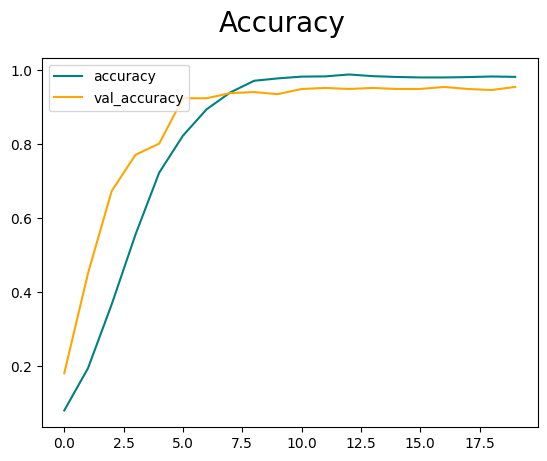

In [21]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [22]:
import json
with open("class_names.json", "w") as f:
    json.dump(class_names, f)

In [23]:
model.save('model.keras')